# Deeplab

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [2]:
sz = 256
num_slice = 25

num_gpus = 2
gpu_start = 8
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
# device_ids = [0,1,4,5]
torch.cuda.set_device(gpu_start)
bs = 10 * num_gpus

model_name = 'deeplab'
datapaths = ['data/train/AOI_2_Vegas_Train', 'data/train/AOI_3_Paris_Train', 'data/train/AOI_4_Shanghai_Train', 'data/train/AOI_5_Khartoum_Train']
datapath = datapaths[1]

In [3]:
data = None
is_eval, is_pred = False, False

In [4]:
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                        is_eval=is_eval, is_pred=is_pred)
(trn_x,trn_y), (val_x,val_y) = data
learn.load('deeplab-paris')


Data finished loading: data/train/AOI_3_Paris_Train


In [5]:
%%time
lr = 1e-5 / 10
lrs = np.array([lr/9, lr])
wd = 0.01
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 1, 'deeplab-paris', lrs=lrs, n_cycles=3, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-paris')

epoch      trn_loss   val_loss   mask_acc                    
    0      0.125178   0.152176   0.067723  
    1      0.131781   0.085302   0.067723                    
    2      0.127561   0.086995   0.067723                    
    3      0.125424   0.083776   0.067723                    
    4      0.12739    0.087964   0.067723                    
    5      0.126598   0.085381   0.067723                    
    7      0.129456   0.176854   0.067723                    
    8      0.12848    0.207351   0.067723                    
    9      0.131298   0.086785   0.067723                    
 46%|████▌     | 198/432 [04:46<05:38,  1.45s/it, loss=0.128]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  2%|▏         | 2/121 [00:06<06:06,  3.08s/it, loss=0.123]  


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc                    
    0      0.259184   1.64266    0.802396  



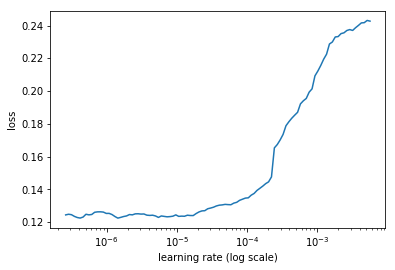

In [8]:
learn.lr_find(1e-7, 1e-2)
learn.sched.plot()